# Spam Classification using Machine Learning Algorithms

## The problem
<p>

In [2]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from IPython.display import HTML, display

In [3]:
column_names = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet',
       'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 
       'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
       'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 
       'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab',
       'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415',
       'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm',
       'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project',
       'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
       'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total','spam']
#dataset = pd.read_csv('spambase.data',names = col_names);

In [4]:
dataset = pd.read_csv('spambase.data', names = column_names)

In [39]:
dataset.shape

(4601, 58)

In [40]:
dataset.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


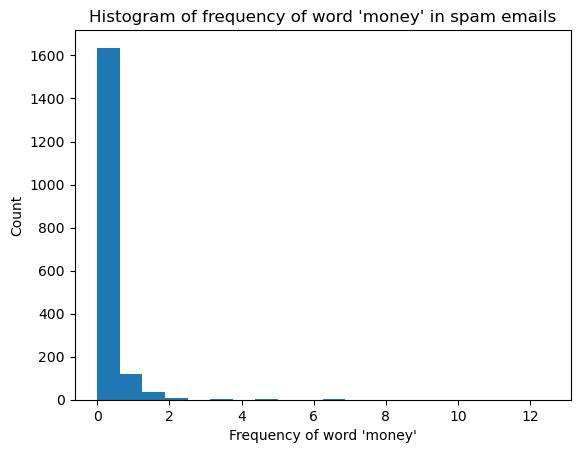

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
spam_data = dataset[dataset['spam'] == 1]
money_frequency = spam_data["word_freq_money"].tolist()
# Create a histogram of the frequency of the word "money" in the spam emails
plt.hist(money_frequency, bins=20)
plt.xlabel("Frequency of word 'money'")
plt.ylabel("Count")
plt.title("Histogram of frequency of word 'money' in spam emails")
plt.show()

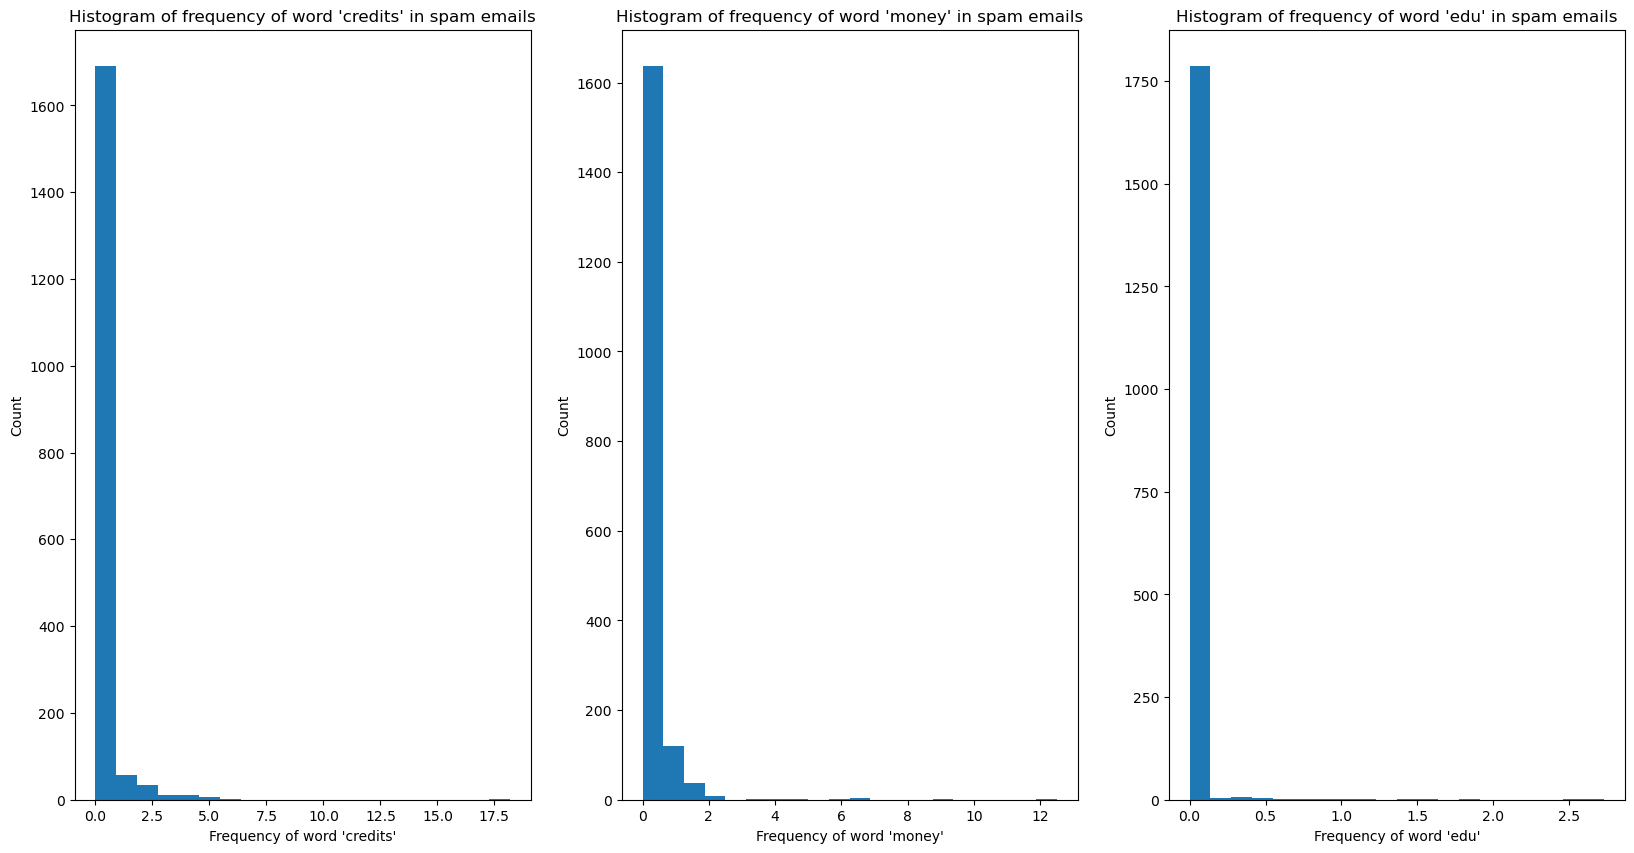

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to only include spam emails
spam_data = dataset[dataset["spam"] == 1]

# Get the frequency of the word "credits" and "money" in the spam emails
credits_freq = spam_data["word_freq_credit"].tolist()
money_freq = spam_data["word_freq_money"].tolist()
edu_freq = spam_data["word_freq_edu"].tolist()
# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

# Plot the histogram for "credits" frequency in the first subplot
axs[0].hist(credits_freq, bins=20)
axs[0].set_xlabel("Frequency of word 'credits'")
axs[0].set_ylabel("Count")
axs[0].set_title("Histogram of frequency of word 'credits' in spam emails")

# Plot the histogram for "money" frequency in the second subplot
axs[1].hist(money_freq, bins=20)
axs[1].set_xlabel("Frequency of word 'money'")
axs[1].set_ylabel("Count")
axs[1].set_title("Histogram of frequency of word 'money' in spam emails")

#plot the historgram for word edu on third subplot
axs[2].hist(edu_freq, bins = 20)
axs[2].set_xlabel("Frequency of word 'edu'")
axs[2].set_ylabel("Count")
axs[2].set_title("Histogram of frequency of word 'edu' in spam emails")

# Show the plot
plt.show()

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order']


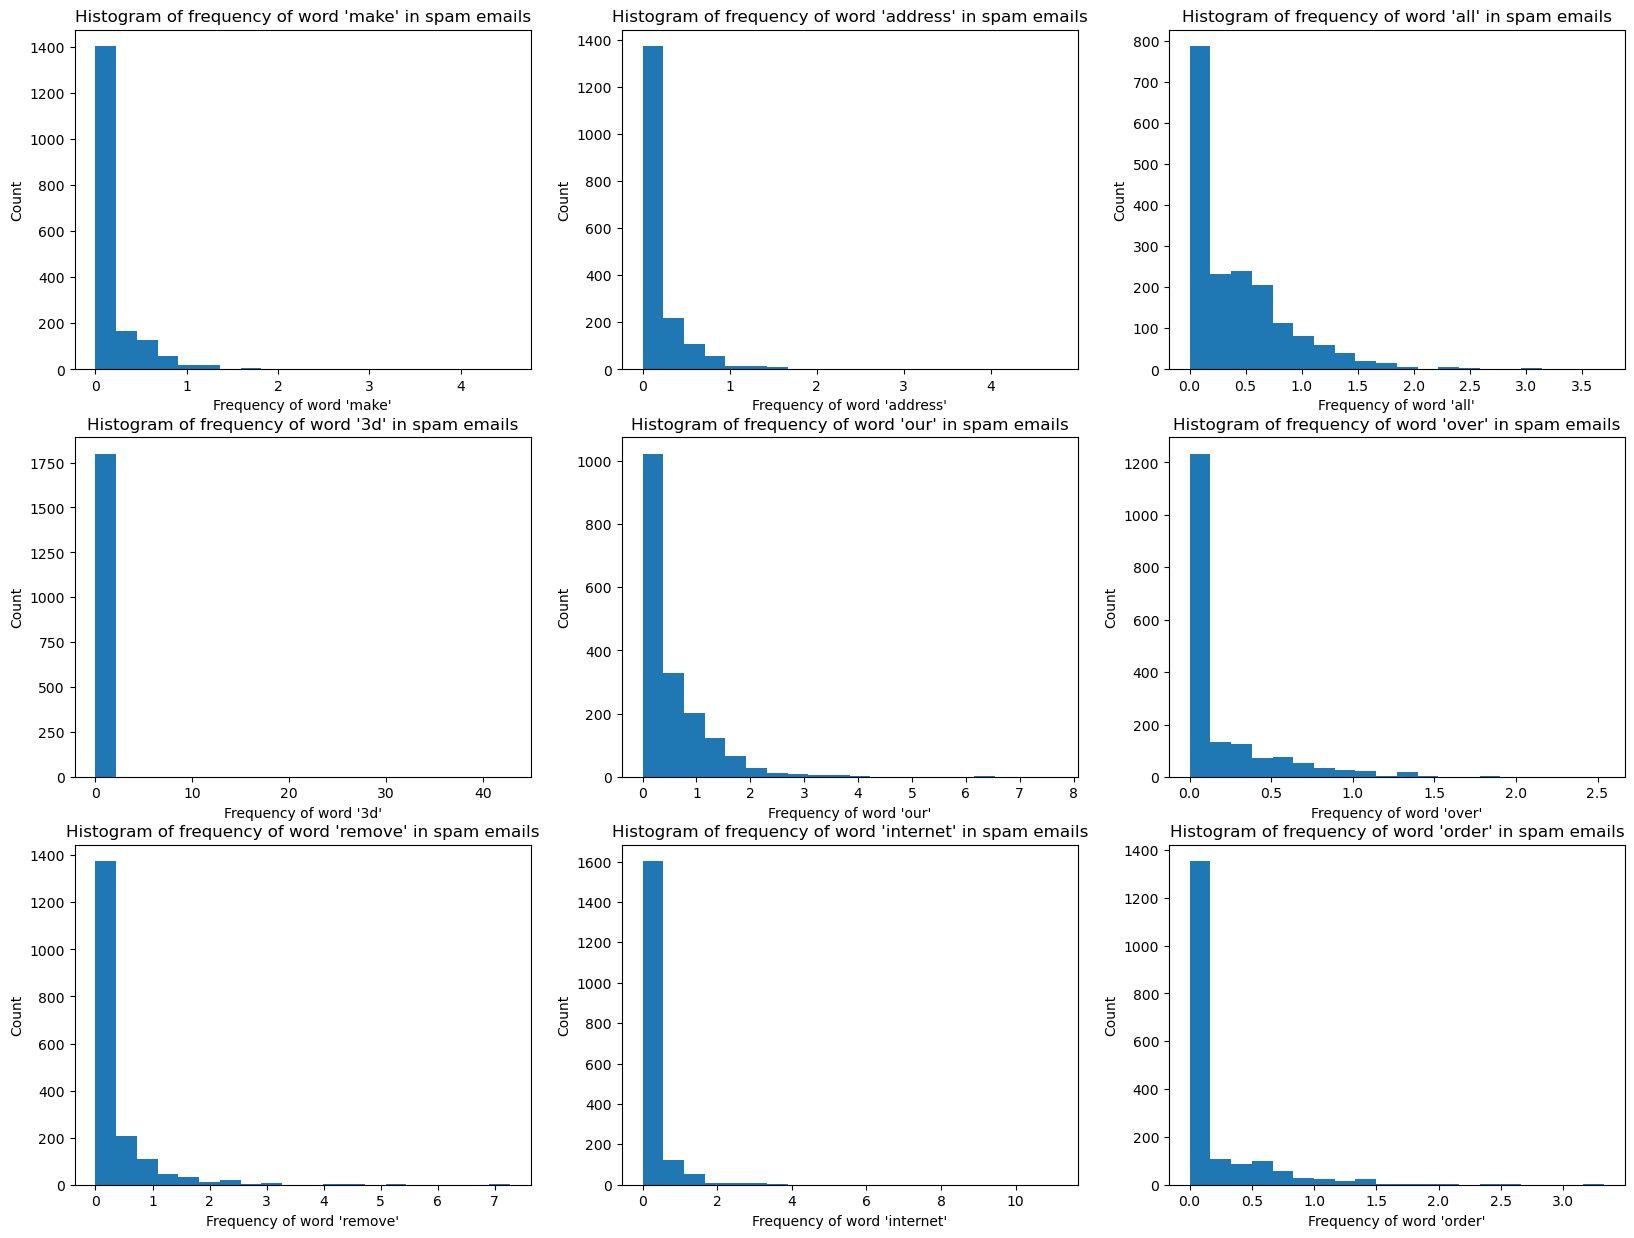

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to only include spam emails
spam_data = dataset[dataset["spam"] == 1]

# Get a list of all the columns that start with "word_freq_"
word_freq_cols = [col for col in spam_data.columns if col.startswith("word_freq_")][:9]
print(word_freq_cols)

# Create a figure with subplots for each word frequency column
fig, axs = plt.subplots(3,3, figsize=(20, 15))

# Plot histograms for each word frequency column
for i, col in enumerate(word_freq_cols):
    row = i // 3  # Determine the row of the subplot
    col_name = col.split('_')[-1]  # Get the last part of the column name
    word_freq = spam_data[col].tolist()
    axs[row, i % 3].hist(word_freq, bins=20)
    axs[row, i % 3].set_xlabel(f"Frequency of word '{col_name}'")
    axs[row, i % 3].set_ylabel("Count")
    axs[row, i % 3].set_title(f"Histogram of frequency of word '{col_name}' in spam emails")

# Show the plot
plt.show()

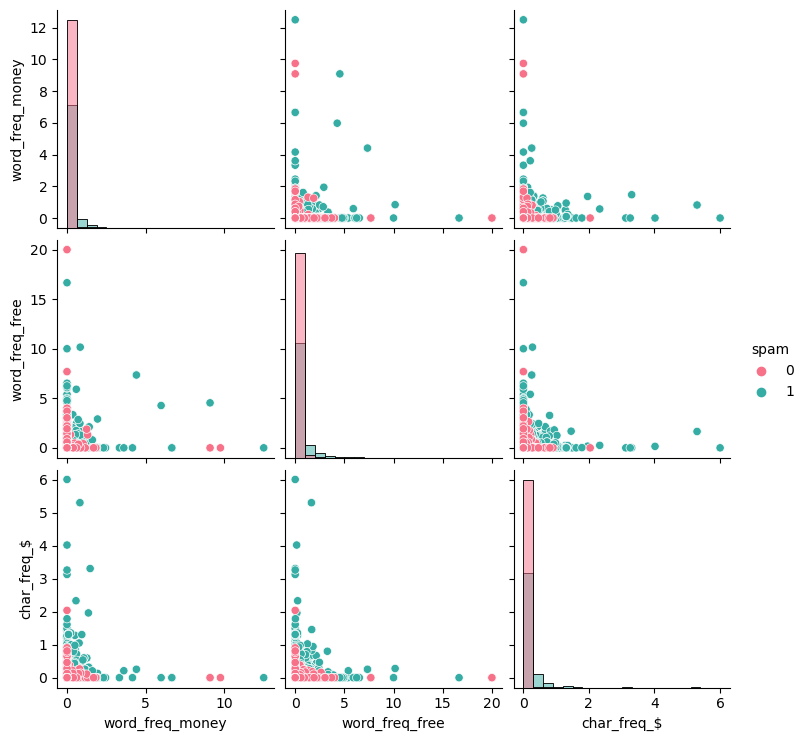

                 word_freq_money  word_freq_free  char_freq_$
word_freq_money         1.000000        0.096812     0.104691
word_freq_free          0.096812        1.000000     0.049953
char_freq_$             0.104691        0.049953     1.000000


In [44]:
import pandas as pd
import seaborn as sns

# Load the dataset
#data = pd.read_csv("spambase.data")

# Create a scatter plot matrix with correlation coefficients
sns.pairplot(dataset, hue="spam", diag_kind="hist", 
             diag_kws={"bins": 20}, palette="husl", 
             vars=["word_freq_money", "word_freq_free", "char_freq_$"])
plt.show()

# Calculate the correlation matrix
corr_matrix = dataset[["word_freq_money", "word_freq_free", "char_freq_$"]].corr()

# Print the correlation matrix
print(corr_matrix)

In [45]:
# checking the number of capital letters appearing on the spam mails
total_capital_letters = dataset[dataset.columns[-4:]]# retrieving the last four columns
total_capital_letters.columns = ['Capital_run_length_average', 'Capital_run_length_longest', 'Total_capital', 'Spam_label']
total_capital_letters

,Capital_run_length_average,Capital_run_length_longest,Total_capital,Spam_label
0,3.756,61,278,1
1,5.114,101,1028,1
2,9.821,485,2259,1
3,3.537,40,191,1
4,3.537,40,191,1
...,...,...,...,...
4596,1.142,3,88,0
4597,1.555,4,14,0
4598,1.404,6,118,0
4599,1.147,5,78,0


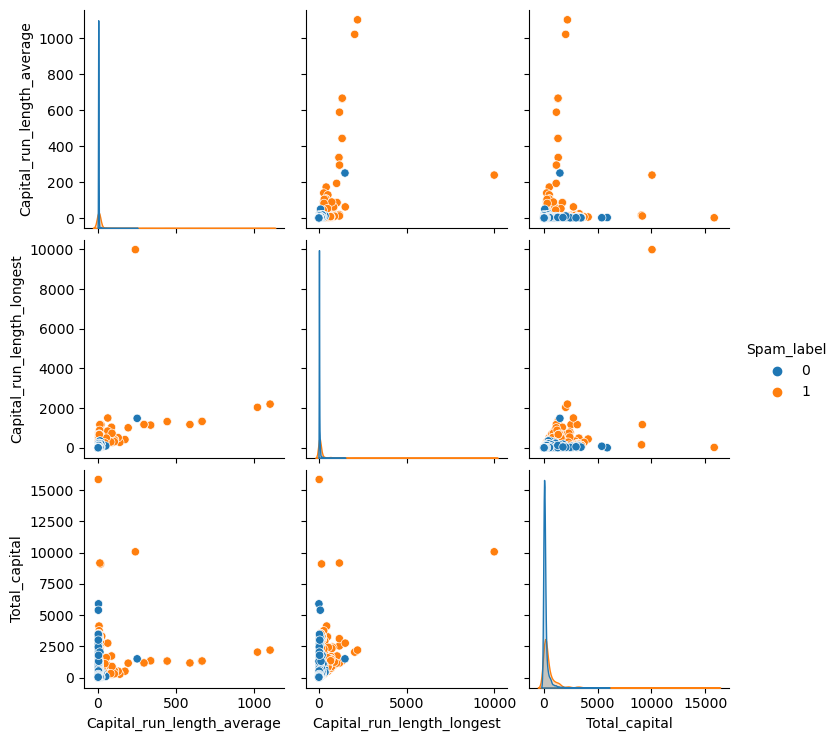

In [46]:
plt.rcParams['font.size'] = 10
sns.pairplot(data = total_capital_letters, hue = 'Spam_label')

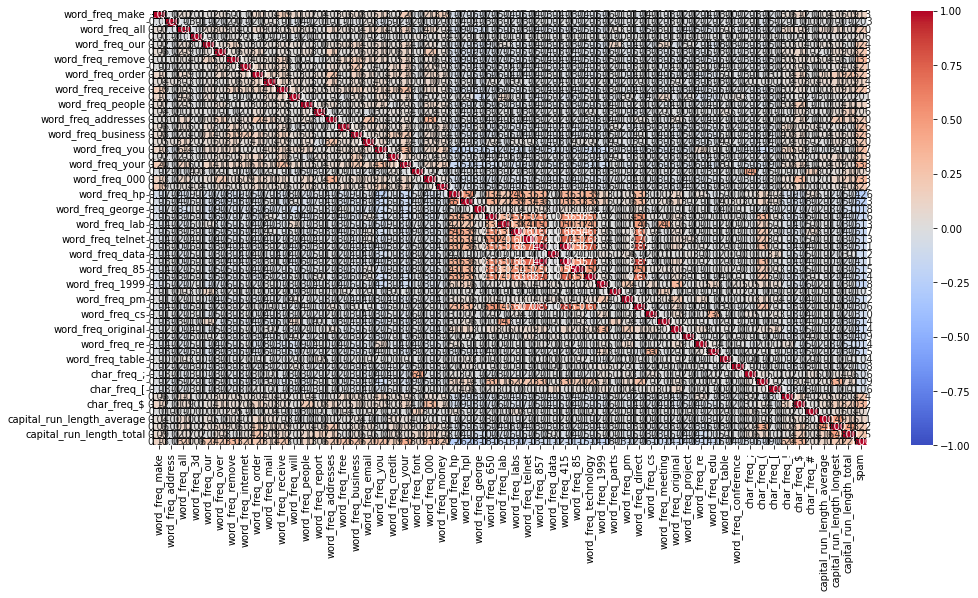

In [ ]:
# check for data correlations using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.heatmap(dataset.corr(), vmin=-1,vmax=1, cmap='coolwarm', annot=True, linewidths=0.5, linecolor='black', fmt='.2f')
plt.show()

<p> Visualising the ratio of spam mails to ham mails in the dataset </p>

In [47]:
#calculate the amount of ham mails(0) and spam mails(1) in the dataset
spam_count = (dataset['spam'] == 1).sum()
ham_count = (dataset['spam'] == 0).sum()
print('Spam count: ', spam_count)
print('Ham count: ', ham_count)

Spam count:  1813
Ham count:  2788


In [48]:
# ratio of ham and spam in index
total_ratio=[spam_count, ham_count]

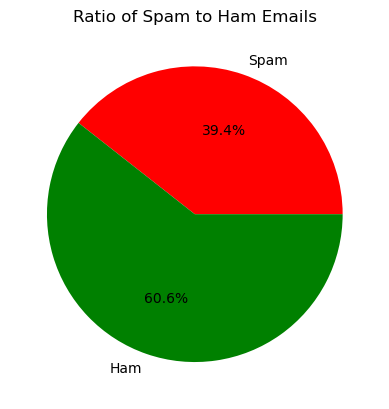

In [49]:
# plot the ham mails to spam mails in a pie chart
plt.pie(total_ratio, labels=["Spam", "Ham"],autopct='%1.1f%%', colors=["red", "green"])
plt.title("Ratio of Spam to Ham Emails")
plt.show()

<p> Do a little bit more visualisations before proceeding </p>

## Data Preprocessing and Cleaning

In [56]:
# find any missing values in the dataset
dataset.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

In [5]:
#
from sklearn.model_selection import train_test_split
X = dataset.iloc[:,:-1].values #Taking everything but the spam value
y = dataset.iloc[:, -1:].values.ravel() #Taking the spam value
print(f"shape of x: {X.shape}")
print(f"shape of y: {y.shape}")

shape of x: (4601, 57)
shape of y: (4601,)


In [6]:
# scale the data with standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(X)

In [52]:
print(f"x shape is: ", X.shape)
print(f"y shape is: ", y.shape)
print(y)

x shape is:  (4601, 57)
y shape is:  (4601,)
[1 1 1 ... 0 0 0]


In [7]:
import numpy as np # importing numpy library

class LogisticRegression:
    # a constuctor method of the class Logistic regression
    def __init__(self, learning_rate=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.learning_rate = learning_rate
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        #the method above initialises the instance variables of the class
        #learning rate is indicating the learning rate to be used
        #num_iterations is indicating the number of iterations for the gradient descent
        #fit_intercept is a boolean value to check whether the algorithm should fit an intercept term or not
        #verbose is also a boolean value to print the loss value during the training
    
    def lg_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    # The method above adds an intercept term to the input matrix X. By doing so we can get a better probability of the target class better.
    
    def lg_sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
        # the method above helps us to calculate the sigmoid function which maps the input value to a value between 0 and 1
        # the main role of sigmoid here is to transform the linear equation of the form w_0 + w_1*x_1...w_n*x_n to a probability value
        #between 0 and 1. here z is the linear combination of input features and w_0 to w_n is the model params
    
    def lg_loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
        # the method computes the loss between the predicted probability value(h) and true variable y(in our case spam class).we are using the 
        #logistic loss function above
        # the reason to use this method is that we need to measure how close we are to the target variable. the goal here is to reduce the loss
        #function to a minimum
        # measures the difference between the predicted probability and the true value
    def fit(self, X, y):
        if self.fit_intercept: # if the fit_intercept is set to true
            X = self.lg_intercept(X) # adding a zero vector same length as the number of columns in X
            # the code above checks whether the fit_intercept is set to true
            #then adds a n intercept term(column of ones) to the input feature X
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        # the code above initialises the weights of LR to zeros
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            s = self.lg_sigmoid(z)
            gradient = np.dot(X.T, (s - y)) / y.size# calculating the gradient
            self.theta -= self.learning_rate * gradient# updating the weights
            
            if self.verbose and i % 10000 == 0:
                z = np.dot(X, self.theta)
                h = self.lg_sigmoid(z)
                print(f'Loss: {self.lg_loss(h, y)} \t')
            # the code above sets verbose to true and prints the loss value every 10,000 iterations
    
    # the method below predicts whether the input given belongs to the class.
    def lg_predict_proba(self, X):
        if self.fit_intercept:
            X = self.lg_intercept(X)# setting intercept to true
    
        return self.lg_sigmoid(np.dot(X, self.theta)) # calculating the dot product of x with learned weights(theta) applies sigmoid on top
        # to get the probability of input belonging to positive class 
       

    # method below calculates the probability of positive class using predict_proba method.
    def predict(self, X, threshold=0.5):
        return self.lg_predict_proba(X) >= threshold # returns the probability of positive class
        #if the probability is bigger or equal to threshold then set to 1 and 0 otherwise


## Helper functions for training, testing and Plotting results

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split as split

In [9]:
def split_dataset(X, y, split_ratios):
    return split(X, y, test_size= 1-split_ratios, random_state=42)

In [10]:
def model_train_predict(model,X_train, y_train, X_test):
    model.fit(X_train, y_train)
    training_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
    return training_prediction, test_prediction

In [11]:
def calculate_evalutation_metric(y_train, training_pred, y_test, testing_pred):
    train_accuracy = accuracy_score(y_train, training_pred)
    test_accuracy = accuracy_score(y_test, testing_pred)
    train_precision = precision_score(y_train, training_pred)
    test_precision = precision_score(y_test, testing_pred)
    train_recall = recall_score(y_train, training_pred)
    test_recall = recall_score(y_test, testing_pred)
    train_f1 = f1_score(y_train, training_pred)
    test_f1 = f1_score(y_test, testing_pred)
    return train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1

In [12]:
def printEvaluationmetrics(split_ratios, Evaluation_metric):
    train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1 = Evaluation_metric
    print(f"Split ratio:{ split_ratios:.2f}")
    print(f"Train Accuracy: {train_accuracy:.3f}")
    print(f"Test Accuracy: {test_accuracy:.3f}")
    print(f"Train Precision: {train_precision:.3f}")
    print(f"Test Precision: {test_precision:.3f}")
    print(f"Train Recall: {train_recall:.3f}")
    print(f"Test Recall: {test_recall:.3f}")
    print(f"Train F1: {train_f1:.3f}")
    print(f"Test F1: {test_f1:.3f}")
    print(" ")
    print("")
    

In [13]:
def plotAccuracy_scores(split_ratios, train_accuracy_scores, test_accuracy_scores):
    plt.plot(split_ratios, train_accuracy_scores, label="Train Accuracy", marker='o', color='red', linestyle='dashed')
    plt.plot(split_ratios, test_accuracy_scores, label="Test Accuracy", marker='o', color='blue', linestyle='dashed')
    plt.xlabel("Split ratio")
    plt.ylabel("Accuracy")
    plt.title("Accuracy vs Split ratio")
    plt.legend()
    plt.grid()
    plt.show()

In [14]:
def model_evaluation(model,X,y,split_ratios):
    train_acc = []
    test_acc = []
    for split_ratio in split_ratios:
        X_train,X_test, y_train, y_test = split_dataset(X, y, split_ratio)
        training_pred, testing_pred = model_train_predict(model,X_train, y_train, X_test)
        Evaluation_metric = calculate_evalutation_metric(y_train, training_pred, y_test, testing_pred)
        printEvaluationmetrics(split_ratio, Evaluation_metric)
        train_accuracy, test_accuracy, train_precision, test_precision, train_recall, test_recall, train_f1, test_f1 = Evaluation_metric
        train_acc.append(train_accuracy)
        test_acc.append(test_accuracy)
    plotAccuracy_scores(split_ratios, train_acc, test_acc)

        

In [15]:
model1 = LogisticRegression(learning_rate=0.1,num_iter=100000)# initialising the model


<p> The code block below trains the model, predicts on the training and test set and plots the accuracy of each splitting </p>

C:\Users\Aroma\AppData\Local\Temp\ipykernel_25080\1195514284.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Split ratio:0.50
Train Accuracy: 0.885
Test Accuracy: 0.882
Train Precision: 0.816
Test Precision: 0.808
Train Recall: 0.911
Test Recall: 0.921
Train F1: 0.861
Test F1: 0.861
 



C:\Users\Aroma\AppData\Local\Temp\ipykernel_25080\1195514284.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Split ratio:0.60
Train Accuracy: 0.875
Test Accuracy: 0.889
Train Precision: 0.794
Test Precision: 0.815
Train Recall: 0.911
Test Recall: 0.940
Train F1: 0.849
Test F1: 0.873
 



C:\Users\Aroma\AppData\Local\Temp\ipykernel_25080\1195514284.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Split ratio:0.70
Train Accuracy: 0.750
Test Accuracy: 0.733
Train Precision: 0.909
Test Precision: 0.933
Train Recall: 0.388
Test Recall: 0.388
Train F1: 0.543
Test F1: 0.548
 



C:\Users\Aroma\AppData\Local\Temp\ipykernel_25080\1195514284.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Split ratio:0.80
Train Accuracy: 0.763
Test Accuracy: 0.767
Train Precision: 0.624
Test Precision: 0.646
Train Recall: 0.974
Test Recall: 0.995
Train F1: 0.761
Test F1: 0.783
 



C:\Users\Aroma\AppData\Local\Temp\ipykernel_25080\1195514284.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Split ratio:0.90
Train Accuracy: 0.877
Test Accuracy: 0.896
Train Precision: 0.794
Test Precision: 0.852
Train Recall: 0.926
Test Recall: 0.913
Train F1: 0.855
Test F1: 0.881
 



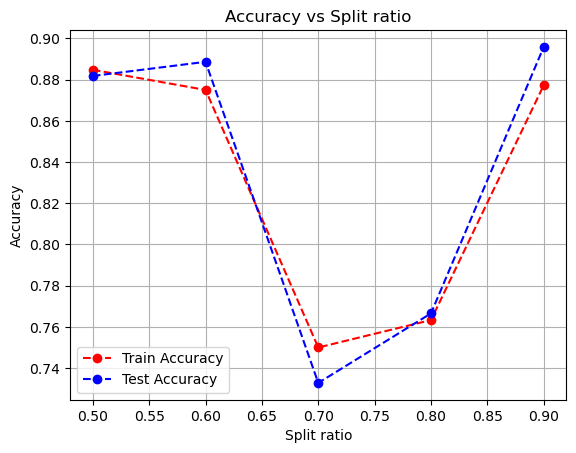

In [16]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
model_evaluation(model1,X,y,split_ratios)

## Training Data Evaluation

|Algorithm| Splitting|Training Acc|training Precision|Training Recall|Training F1-score|
|--------------------|----------|-----|----|----|------|
|Logistic Regression| 50-50|0.885|0.816|0.911|0.861|
|Logistic Regression| 60-40|0.875|0.794|0.911|0.849|
|Logistic Regression| 70-30|0.750|0.909|0.388|0.543|
|Logistic Regression| 80-20|0.763|0.624|0.974|0.761|
|Logistic Regression| 90-10|0.877|0.794|0.926|0.855|

### Testing Data Evaluation

|Algorithm| Splitting| Testing Acc|Testing Precision|Testing Recall|Testing F1-score|
|--------------------|----------|-----|----|----|------|
|Logistic Regression| 50-50|0.882|0.808|0.921|0.861
|Logistic Regression| 60-40|0.889|0.815|0.940|0.873
|Logistic Regression| 70-30|0.733|0.933|0.388|0.548
|Logistic Regression| 80-20|0.767|0.820|0.797|0.765
|Logistic Regression| 90-10|0.896|0.892|0.898|0.894

(461,)
(461, 57)


C:\Users\Aroma\AppData\Local\Temp\ipykernel_25080\1195514284.py:22: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


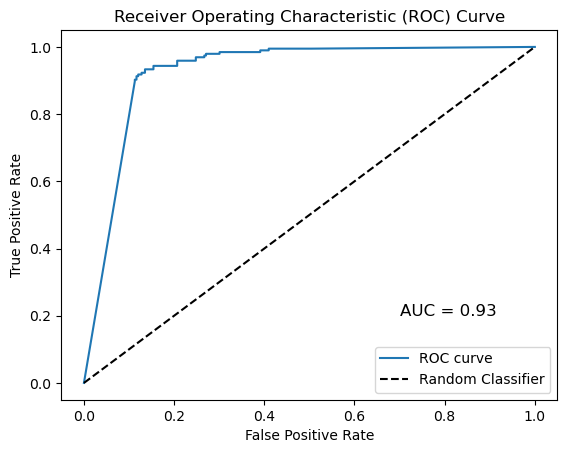

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1])

# Assuming y_pred and y_true are the predicted and true labels for the test set
print(y_test.shape)
print(X_test.shape)
y_pred = model1.lg_predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

In [18]:
from sklearn.linear_model import LogisticRegression
sklearn_logistic = LogisticRegression( dual=False,fit_intercept=True, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

c:\ProgramData\Anaconda3\envs\DM\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\Anaconda3\envs\DM\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Split ratio:0.50
Train Accuracy: 0.921
Test Accuracy: 0.915
Train Precision: 0.913
Test Precision: 0.901
Train Recall: 0.883
Test Recall: 0.883
Train F1: 0.898
Test F1: 0.892
 

Split ratio:0.60
Train Accuracy: 0.921
Test Accuracy: 0.925
Train Precision: 0.908
Test Precision: 0.913
Train Recall: 0.885
Test Recall: 0.903
Train F1: 0.896
Test F1: 0.908
 

Split ratio:0.70
Train Accuracy: 0.919
Test Accuracy: 0.926
Train Precision: 0.902
Test Precision: 0.922
Train Recall: 0.886
Test Recall: 0.899
Train F1: 0.894
Test F1: 0.911
 

Split ratio:0.80
Train Accuracy: 0.923
Test Accuracy: 0.925
Train Precision: 0.904
Test Precision: 0.923
Train Recall: 0.895
Test Recall: 0.897
Train F1: 0.899
Test F1: 0.910
 

Split ratio:0.90
Train Accuracy: 0.924
Test Accuracy: 0.928
Train Precision: 0.908
Test Precision: 0.940
Train Recall: 0.897
Test Recall: 0.887
Train F1: 0.902
Test F1: 0.913
 



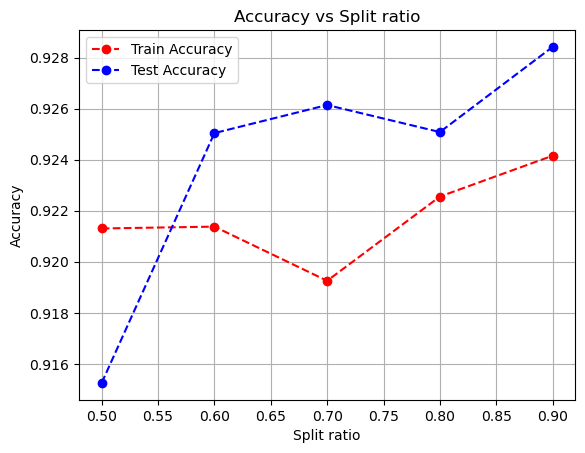

In [19]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
model_evaluation(sklearn_logistic,X,y,split_ratios)

(461,)
(461, 57)


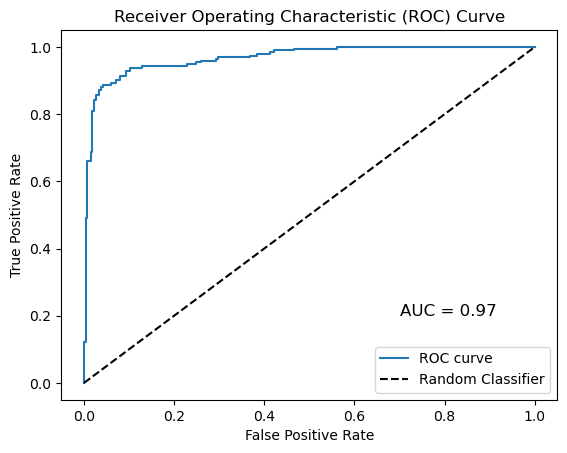

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1])
print(y_test.shape)
print(X_test.shape)
y_pred1 = sklearn_logistic.predict_proba(X_test)[:, 1] # we only need the probabilities for the positive class
fpr, tpr, thresholds = roc_curve(y_test, y_pred1) # calculate the ROC curve

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred1)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

## Creation of Decision Tree

In [21]:
import numpy as np
class DecisionTree:

    # constructor for initialising the decision tree with one parameter max_depth
    def __init__(self, max_depth=None): # initialize the tree with max_depth 
        self.max_depth = max_depth

    @staticmethod
    def dt_entropy(y): # calculate the entropy of a set of labels
        _, counts = np.unique(y, return_counts=True) # get the counts of each unique label
        probability = counts / len(y)# calculate the probabilities of each unique label
        decisiontree_entropy = -np.sum(probability * np.log2(probability))# calculate the entropy note that negative sum of the probability * log2(probability) gives a negative values
        #but entropy needs a positive value thus the inverse of the negative value is taken.
        return decisiontree_entropy # return the entropy
    # the static method entropy above  calculates the entropy of a set of labels. It is used to find the randomness/ uncertainity on the dataset.

    def decisiontree_best_split(self, X, y): # find the best split for the data
        best_inf_gain = 0 # keep track of the best information gain
        best_feature_index = 0 # keep track of the index of the best feature to split on
        best_split_value = 0 # keep track of the value to split the best feature on

        for feature_index in range(X.shape[1]): # loop through all the features
            decision_split_values = np.unique(X[:, feature_index]) # get all the unique values of the current feature
            for split_value in decision_split_values: # loop through all the possible split values for the current feature
                left_mask = X[:, feature_index] <= split_value # create a mask for all the samples with a feature value less than or equal to the split value
                right_mask = ~left_mask # create a mask for all the samples with a feature value greater than the split value
                # ~ is the bitwise not operator. It is used to reverse the boolean elements if right mask values are true then left will be false and viceversa.

                left_entropy = self.dt_entropy(y[left_mask]) # calculate the entropy of the left split
                right_entropy = self.dt_entropy(y[right_mask]) # calculate the entropy of the right split
                # calculate the information gain from splitting on the current feature and split value

                current_gain = self.dt_entropy(y) - (
                    len(y[left_mask]) * left_entropy + len(y[right_mask]) * right_entropy) / len(y) # calculate the information gain from splitting on the current feature and split value
                # update the best information gain if the current information gain is greater than the best information gain
                if current_gain > best_inf_gain: 
                    best_inf_gain = current_gain # update the best information gain
                    best_feature_index = feature_index # update the index of the best feature to split on
                    best_split_value = split_value # update the value to split the best feature on

        return best_feature_index, best_split_value # return the index of the best feature to split on and the value to split the best feature on
    # the method above(best_split) finds the best possible split for the  input data(x) and the y labels. This method helps finding the maximumg gain
    
    # build the tree recursively
    def _build_tree(self, X, y, depth):
        if len(np.unique(y)) == 1 or depth == self.max_depth: # if all the labels are the same or the max depth has been reached
           class_counts = np.bincount(y) # get the counts of each label
           total_count = len(y) # get the total number of labels
           return {"class_counts": class_counts, "total_count": total_count} # return the counts of each label and the total number of labels
        feature_index, split_value = self.decisiontree_best_split(X, y) # get the best feature to split on and the value to split on

        left_mask = X[:, feature_index] <= split_value # create a mask for all the samples with a feature value less than or equal to the split value
        right_mask = ~left_mask # create a mask for all the samples with a feature value greater than the split value
        # build the left and right subtrees recursively
        node = {
            "feature_index": feature_index, # the index of the feature to split on
            "split_value": split_value, # the value to split the feature on
            "left": self._build_tree(X[left_mask], y[left_mask], depth + 1), # the left subtree
            "right": self._build_tree(X[right_mask], y[right_mask], depth + 1) # the right subtree
        }
        return node # return the node
    # fit the decision tree to the training data
    def fit(self, X, y):
        self.n_classes_ = len(np.unique(y)) # get the number of unique labels
        self.tree = self._build_tree(X, y, 0) # build the tree
    # make a prediction for a single sample
    def _predict_sample(self, x, tree):
      if "class_counts" in tree and "total_count" in tree: # if the current node is a leaf node
          return np.argmax(tree["class_counts"]) # return the label with the most samples
      feature_index = tree["feature_index"] # get the index of the feature to split on
      split_value = tree["split_value"] # get the value to split the feature on
    
      if x[feature_index] <= split_value: # if the sample's feature value is less than or equal to the split value
          return self._predict_sample(x, tree["left"]) # make a recursive call to the left subtree
      else:
          return self._predict_sample(x, tree["right"]) # make a recursive call to the right subtree
    # make predictions for a list of samples
    def predictSample_probability(self, x, tree):
       if "class_counts" in tree and "total_count" in tree: # if the current node is a leaf node
         #return tree["class_counts"]/ tree["total_count"]
        probabilites = tree["class_counts"] / tree["total_count"] # calculate the probabilities of each label

        full_probabilities = np.zeros(self.n_classes_) # create an array of zeros with the same length as the number of unique labels
        full_probabilities[:len(probabilites)] = probabilites # set the probabilities of the labels that the tree predicted
        return full_probabilities # return the probabilities of each label

       feature_index = tree["feature_index"] # get the index of the feature to split on
       split_value = tree["split_value"] #  get the value to split the feature on

       if x[feature_index] <= split_value: # if the sample's feature value is less than or equal to the split value
          return self.predictSample_probability(x, tree["left"]) #  make a recursive call to the left subtree
       else:
          return self.predictSample_probability(x, tree["right"]) # make a recursive call to the right subtree
    # the below method is used to predict the probability of each class
    def predict_probabilities(self, X):
           probabilities = [self.predictSample_probability(x, self.tree) for x in X] # make predictions for each sample
           return np.vstack(probabilities) # return the predictions
    # method below makes predictions for a list of samples
    def predict(self, X):
        predictions = [self._predict_sample(x, self.tree) for x in X]
        return np.array(predictions)

In [22]:
decision_tree = DecisionTree(max_depth=5)

Split ratio:0.50
Train Accuracy: 0.932
Test Accuracy: 0.905
Train Precision: 0.955
Test Precision: 0.916
Train Recall: 0.868
Test Recall: 0.838
Train F1: 0.909
Test F1: 0.875
 

Split ratio:0.60
Train Accuracy: 0.925
Test Accuracy: 0.907
Train Precision: 0.943
Test Precision: 0.937
Train Recall: 0.857
Test Recall: 0.828
Train F1: 0.898
Test F1: 0.879
 

Split ratio:0.70
Train Accuracy: 0.925
Test Accuracy: 0.908
Train Precision: 0.934
Test Precision: 0.936
Train Recall: 0.864
Test Recall: 0.837
Train F1: 0.898
Test F1: 0.884
 

Split ratio:0.80
Train Accuracy: 0.922
Test Accuracy: 0.906
Train Precision: 0.932
Test Precision: 0.950
Train Recall: 0.862
Test Recall: 0.821
Train F1: 0.895
Test F1: 0.880
 

Split ratio:0.90
Train Accuracy: 0.919
Test Accuracy: 0.902
Train Precision: 0.927
Test Precision: 0.963
Train Recall: 0.859
Test Recall: 0.800
Train F1: 0.892
Test F1: 0.874
 



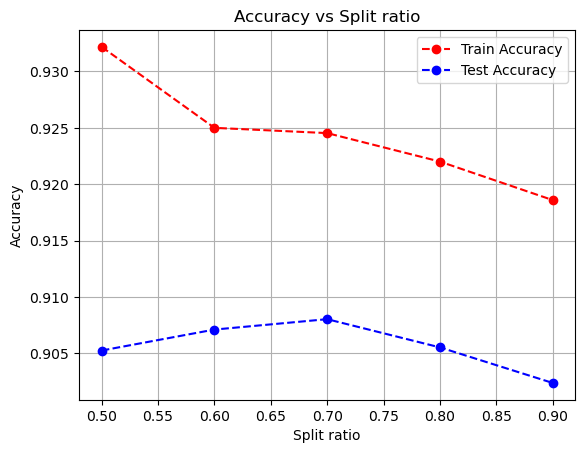

In [23]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
model_evaluation(decision_tree,X,y,split_ratios)


|Algorithm| Splitting|Training Acc| Testing Acc|training Precision|Testing Precision|Training Recall|Testing Recall|Training F1-score|testing F1-score|
|--------------------|----------|-----|----|----|------|------|----|----|----|
|Decision Tree| 50-50|0.932|0.905|0.937|0.908|0.921|0.894|0.928|0.899
|Decision Tree| 60-40|0.925|0.907|0.929|0.914|0.912|0.895|0.919|0.902
|Decision Tree| 70-30|0.925|0.908|0.927|0.914|0.913|0.898|0.919|0.904
|Decision Tree| 80-20|0.922|0.906|0.924|0.915|0.911|0.894|0.917|0.901
|Decision Tree| 90-10|0.919|0.902|0.920|0.916|0.908|0.889|0.913|0.897

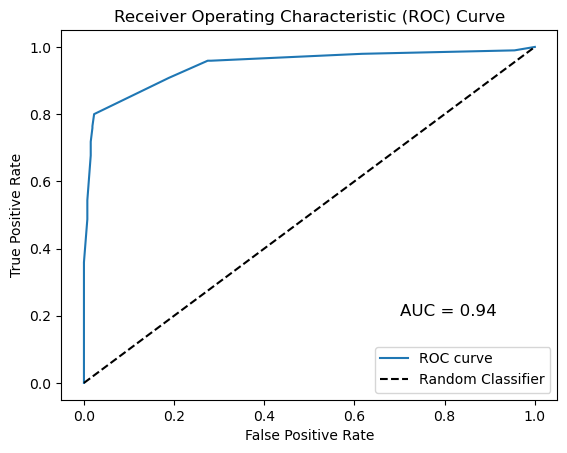

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1])
y_prob = decision_tree.predict_probabilities(X_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_pos)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob_pos)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

## Comparing with sklearn Decision Tree

In [25]:
from sklearn import tree
sklearn_decisontree = tree.DecisionTreeClassifier(max_depth=5)

Split ratio:0.50
Train Accuracy: 0.930
Test Accuracy: 0.904
Train Precision: 0.964
Test Precision: 0.924
Train Recall: 0.852
Test Recall: 0.827
Train F1: 0.905
Test F1: 0.873
 

Split ratio:0.60
Train Accuracy: 0.930
Test Accuracy: 0.905
Train Precision: 0.934
Test Precision: 0.909
Train Recall: 0.881
Test Recall: 0.852
Train F1: 0.907
Test F1: 0.880
 

Split ratio:0.70
Train Accuracy: 0.928
Test Accuracy: 0.900
Train Precision: 0.928
Test Precision: 0.918
Train Recall: 0.881
Test Recall: 0.835
Train F1: 0.904
Test F1: 0.875
 

Split ratio:0.80
Train Accuracy: 0.922
Test Accuracy: 0.898
Train Precision: 0.941
Test Precision: 0.946
Train Recall: 0.852
Test Recall: 0.805
Train F1: 0.895
Test F1: 0.870
 

Split ratio:0.90
Train Accuracy: 0.919
Test Accuracy: 0.918
Train Precision: 0.938
Test Precision: 0.970
Train Recall: 0.850
Test Recall: 0.831
Train F1: 0.892
Test F1: 0.895
 



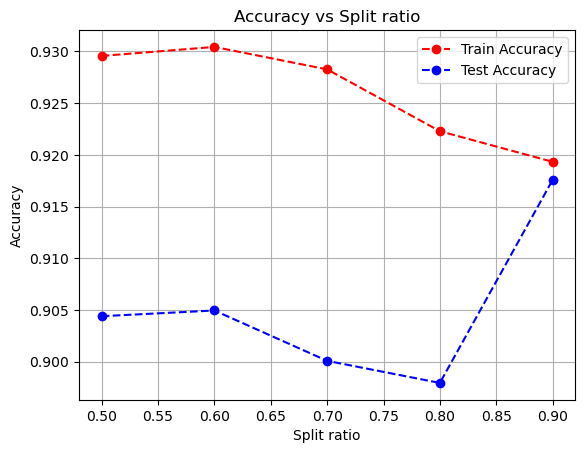

In [26]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
model_evaluation(sklearn_decisontree,X,y,split_ratios)

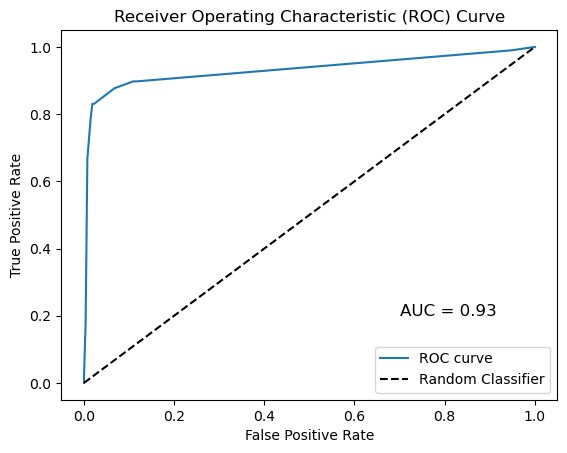

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1])
y_prob = sklearn_decisontree.predict_proba(X_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob_pos)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_prob_pos)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

### Naive Bayes Classifier from scikit learn


In [28]:
from sklearn.naive_bayes import GaussianNB


In [29]:
naive_bayes = GaussianNB()

Split ratio:0.50
Train Accuracy: 0.822
Test Accuracy: 0.814
Train Precision: 0.699
Test Precision: 0.693
Train Recall: 0.956
Test Recall: 0.954
Train F1: 0.808
Test F1: 0.803
 

Split ratio:0.60
Train Accuracy: 0.814
Test Accuracy: 0.817
Train Precision: 0.687
Test Precision: 0.703
Train Recall: 0.952
Test Recall: 0.955
Train F1: 0.798
Test F1: 0.810
 

Split ratio:0.70
Train Accuracy: 0.813
Test Accuracy: 0.825
Train Precision: 0.684
Test Precision: 0.721
Train Recall: 0.954
Test Recall: 0.948
Train F1: 0.797
Test F1: 0.819
 

Split ratio:0.80
Train Accuracy: 0.822
Test Accuracy: 0.821
Train Precision: 0.696
Test Precision: 0.719
Train Recall: 0.958
Test Recall: 0.946
Train F1: 0.806
Test F1: 0.817
 

Split ratio:0.90
Train Accuracy: 0.822
Test Accuracy: 0.835
Train Precision: 0.698
Test Precision: 0.745
Train Recall: 0.962
Test Recall: 0.928
Train F1: 0.809
Test F1: 0.826
 



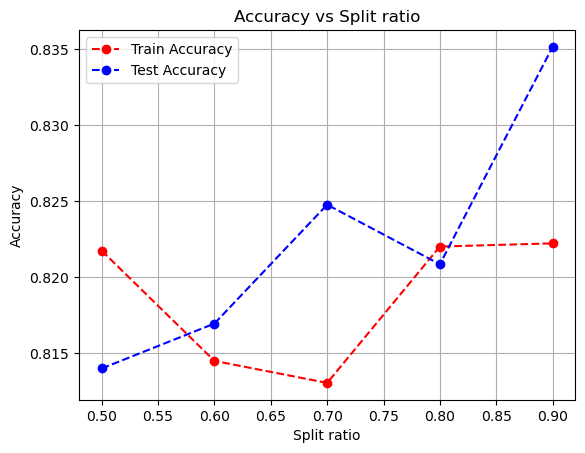

In [30]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
model_evaluation(naive_bayes,X,y,split_ratios)

|Algorithm| Splitting|Training Acc| Testing Acc|training Precision|Testing Precision|Training Recall|Testing Recall|Training F1-score|testing F1-score|
|--------------------|----------|-----|----|----|------|------|----|----|----|
|Naive Bayes| 50-50|0.822|0.814|0.831|0.826|0.846|0.838|0.821|0.813
|Naive Bayes| 60-40|0.814|0.817|0.824|0.831|0.840|0.838|0.813|0.817
|Naive Bayes| 70-30|0.813|0.825|0.823|0.836|0.840|0.842|0.812|0.825
|Naive Bayes| 80-20|0.822|0.821|0.831|0.834|0.847|0.837|0.821|0.821
|Naive Bayes| 90-10|0.822|0.835|0.833|0.840|0.847|0.848|0.821|0.835

(461,)
(461, 57)


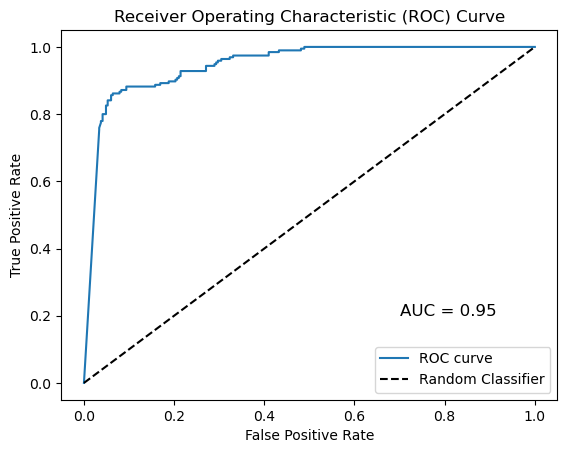

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1])
print(y_test.shape)
print(X_test.shape)
y_pred2 = naive_bayes.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred2)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

## Sklearn Random Forest 

In [32]:
# import random forest classifier
from sklearn.ensemble import RandomForestClassifier


In [33]:
Randomforest = RandomForestClassifier(n_estimators=100, max_depth=5)

Split ratio:0.50
Train Accuracy: 0.939
Test Accuracy: 0.920
Train Precision: 0.970
Test Precision: 0.948
Train Recall: 0.870
Test Recall: 0.844
Train F1: 0.917
Test F1: 0.893
 

Split ratio:0.60
Train Accuracy: 0.938
Test Accuracy: 0.925
Train Precision: 0.964
Test Precision: 0.950
Train Recall: 0.871
Test Recall: 0.862
Train F1: 0.915
Test F1: 0.904
 

Split ratio:0.70
Train Accuracy: 0.936
Test Accuracy: 0.931
Train Precision: 0.960
Test Precision: 0.962
Train Recall: 0.870
Test Recall: 0.870
Train F1: 0.913
Test F1: 0.914
 

Split ratio:0.80
Train Accuracy: 0.935
Test Accuracy: 0.921
Train Precision: 0.960
Test Precision: 0.976
Train Recall: 0.868
Test Recall: 0.833
Train F1: 0.912
Test F1: 0.899
 

Split ratio:0.90
Train Accuracy: 0.935
Test Accuracy: 0.920
Train Precision: 0.957
Test Precision: 0.976
Train Recall: 0.871
Test Recall: 0.831
Train F1: 0.912
Test F1: 0.898
 



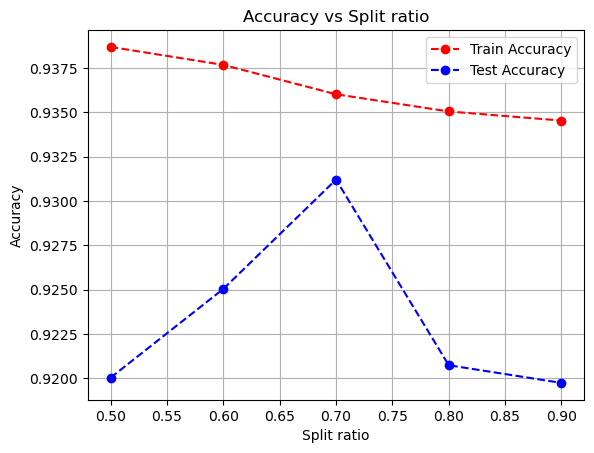

In [34]:
split_ratios = [0.5, 0.6, 0.7, 0.8, 0.9]
model_evaluation(Randomforest,X,y,split_ratios)

## table for training and test set


(461,)
(461, 57)


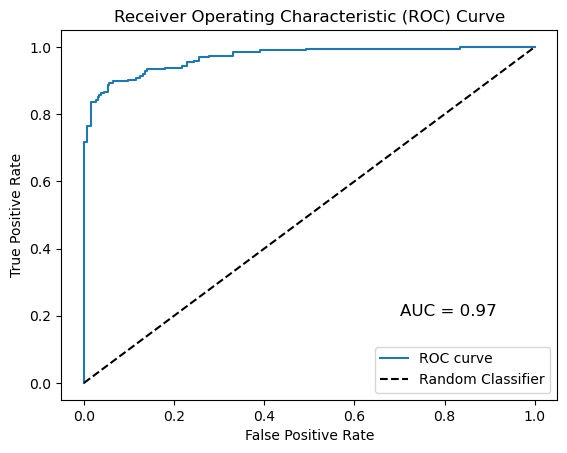

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
X_train, X_test, y_train, y_test = split_dataset(X, y, split_ratios[-1])
print(y_test.shape)
print(X_test.shape)
y_pred2 = Randomforest.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve')

# Plot the random classifier line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

# Calculate the AUC score
auc_score = roc_auc_score(y_test, y_pred2)

# Add the AUC score to the plot
plt.text(0.7, 0.2, f'AUC = {auc_score:.2f}', fontsize=12)

# Set the axis labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

# Show the plot
plt.show()

## Final Evaluation

## Evaluating the best Algorithm among the three based on splitting, accuracy, precision, recall, f1-score

|Algorithm| Best Splitting| Testing Acc|Testing Precision|Testing Recall|testing F1-score|
|--------------------|-------|----------|-----|----|----|
|Logistic Regression| 90-10|0.896|0.892|0.898|0.894
|Sklearn Logistic Regression||||||
|Naive Bayes| 90-10|0.835|0.840|0.848|0.835
|Decision Tree| 70-30|0.908|0.914|0.898|0.904
|sklearn Decision Tree||||||
|sklearn Random Forest||||||



<p> Out the three algorithms the best algorithm that performed on the spambase dataset is Decision Tree with 0.90 on accuracy, 0.91 on precision, 0.89 on recall and 0.90 on f1-score</p>